#**Online Retail Analysis Project**

#**Installing Necessary Modules**

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-04 00:47:59--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  31.5MB/s    in 0.7s    

2025-05-04 00:48:00 (31.5 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
dfx = pd.read_excel('Online Retail.xlsx')
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
dfx[['InvoiceNo', 'StockCode', 'Description', 'Country']] = dfx[['InvoiceNo', 'StockCode', 'Description', 'Country']].astype('string')

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
dfx.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dfx.shape

(541909, 8)

#**Data Cleaning : Handling the Missing Values**

In [ ]:
dfx.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
dfx[dfx.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
dfx[dfx.StockCode=="22139"] ## checking other valid Description with the same code to match

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
dfx[dfx.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
df_freq=dfx[['StockCode','Description']].value_counts().reset_index()
df_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [ ]:
df_freq[df_freq.StockCode=='85123A'] ## suppose to take the most frequent description for the particular StockCode

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3320,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4283,85123A,?,1
4284,85123A,wrongly marked carton 22804,1


In [ ]:
most_freq =df_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [ ]:
most_freq.columns = ['StockCode', 'Freq_Description', 'freq']
dfx1 = pd.merge(dfx, most_freq, on='StockCode', how='left')
dfx1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,freq
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
dfx1['Description']=dfx1['Freq_Description']

In [ ]:
dfx1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Freq_Description,112
freq,112


In [ ]:
dfx1[dfx1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,freq
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
1988,536550,85044,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
2024,536552,20950,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
2026,536554,84670,<NA>,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
280754,561498,21610,<NA>,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,<NA>,NaN
281615,561555,37477B,<NA>,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,<NA>,NaN
281616,561557,37477C,<NA>,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,<NA>,NaN
346849,567207,35592T,<NA>,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,<NA>,NaN


In [ ]:
dfx1.dropna(subset=['Description'], inplace=True)
dfx1.isnull().sum()
## It is acceptable to go with the null on CustmerID in this scenario

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Freq_Description,0
freq,0


In [ ]:
dfx1.drop(columns=['Freq_Description', 'freq'], inplace=True)

In [ ]:
dfx1.describe() # Here Quantity and Unitprice Should not be zero.So kept it for further analysis and will go further with rest of the data

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df=dfx1[(dfx1.Quantity > 0) & (dfx1.UnitPrice > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df1=df.drop_duplicates()
df1.shape

(524876, 8)

In [ ]:
start_date = df1['InvoiceDate'].min()
end_date = df1['InvoiceDate'].max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00


In [ ]:
df1['Country'].unique()

<StringArray>
[      'United Kingdom',               'France',            'Australia',
          'Netherlands',              'Germany',               'Norway',
                 'EIRE',          'Switzerland',                'Spain',
               'Poland',             'Portugal',                'Italy',
              'Belgium',            'Lithuania',                'Japan',
              'Iceland',      'Channel Islands',              'Denmark',
               'Cyprus',               'Sweden',              'Finland',
              'Austria',              'Bahrain',               'Israel',
               'Greece',            'Hong Kong',            'Singapore',
              'Lebanon', 'United Arab Emirates',         'Saudi Arabia',
       'Czech Republic',               'Canada',          'Unspecified',
               'Brazil',                  'USA',   'European Community',
                'Malta',                  'RSA']
Length: 38, dtype: string

# **Outlier Interpretation:**

In [ ]:
# We can notice HUGE values in both Quantity and UnitPrice.
# Outliers in this project are not errors — they represent valid bulk purchases (as confirmed by the business context).
# So, instead of removing them, we showcase them in a separate plot to retain insight without distorting the main view.

#####Box Plot  1: Full Range View (No Limit) ---

In [ ]:
#  Shows full data including large-scale outliers
#  Useful for transparency and understanding outlier impact
#  Note: Extreme values (e.g., 80,000+) will shrink the box and make it harder to see the main distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x7a2a3bd4eb10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a2a3b649150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a2a3d9cffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a2a3b648e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a2a3b64ad10>],
 'means': []}

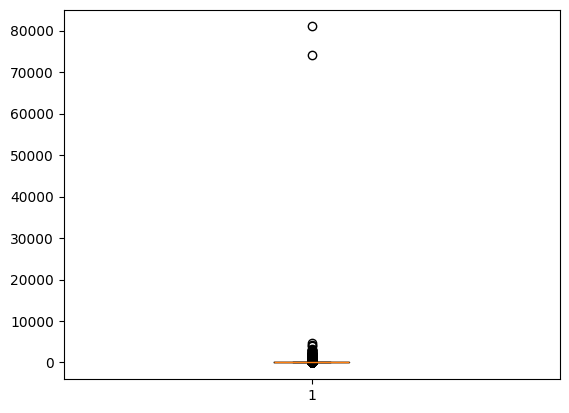

In [ ]:
plt.boxplot(df1.Quantity)

**Box** Plot 2: Medium-Range View (0–1000)

In [ ]:
#  Reveals medium-size bulk purchases
#  Highlights behavior of small businesses or distributors
#  Smooths the transition from regular to bulk

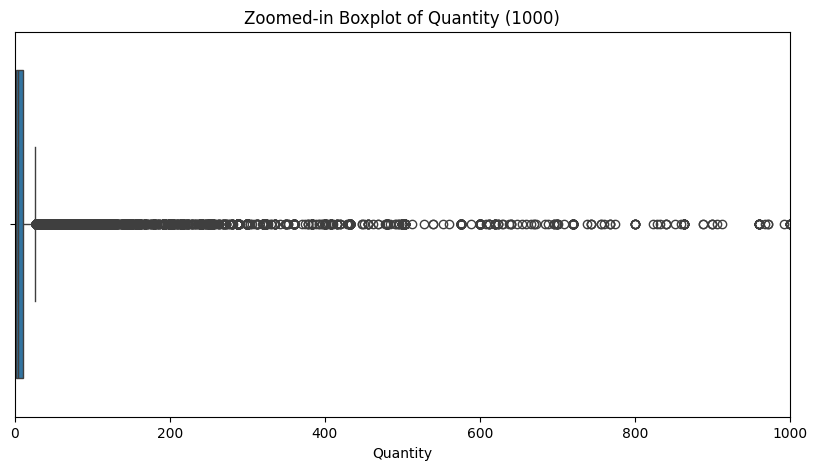

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Quantity'])
plt.xlim(0, 1000)
plt.title("Zoomed-in Boxplot of Quantity (1000)")
plt.show()

##### Box Plot 3: Zoomed-In View (0–100)

In [ ]:
#  Captures small retail purchases (which make up the majority of orders)
#  Helps identify most common buying behavior (typically under 20 units)
#  Useful for customer segmentation and pattern spotting

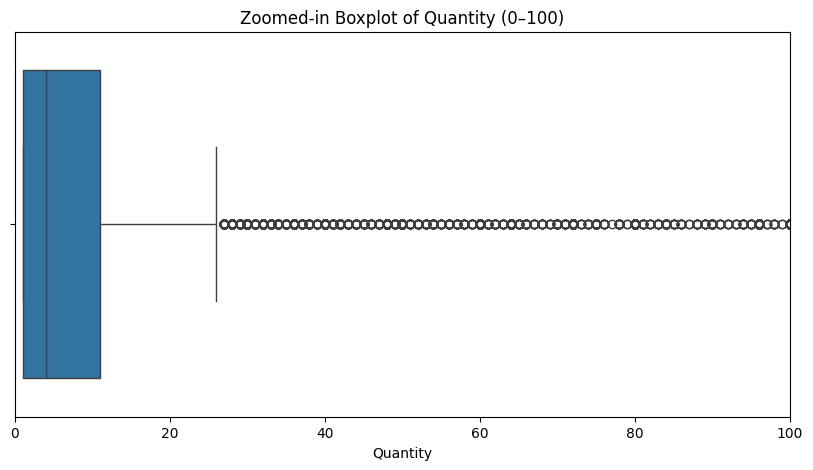

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Quantity'])
plt.xlim(0, 100)  # Zoom into normal range
plt.title("Zoomed-in Boxplot of Quantity (0–100)")
plt.show()

In [ ]:
df1.UnitPrice.quantile(0.9999)

np.float64(1012.8652499996452)

In [ ]:
#  For now, we are not going to worry about extreme values because these can be legitimate values

# **Feature Engineering : Creating New columns**

In [ ]:
df2=df1.copy()
df2['Total_Price']=df2['Quantity']*df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
count,524876.000000,524876,524876.000000,392690.000000,524876.000000
mean,10.616064,2011-07-04 15:30:02.360900608,3.922575,15287.855925,20.274425
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.279818,NaN,36.093096,1713.535580,271.693148


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524876 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  string        
 1   StockCode    524876 non-null  string        
 2   Description  524876 non-null  string        
 3   Quantity     524876 non-null  int64         
 4   InvoiceDate  524876 non-null  datetime64[ns]
 5   UnitPrice    524876 non-null  float64       
 6   CustomerID   392690 non-null  float64       
 7   Country      524876 non-null  string        
 8   Total_Price  524876 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.0 MB


In [ ]:
df2['month'] = df2['InvoiceDate'].dt.month
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12


#**Visualization and EDA**

### 1) Plot Monthly Sales

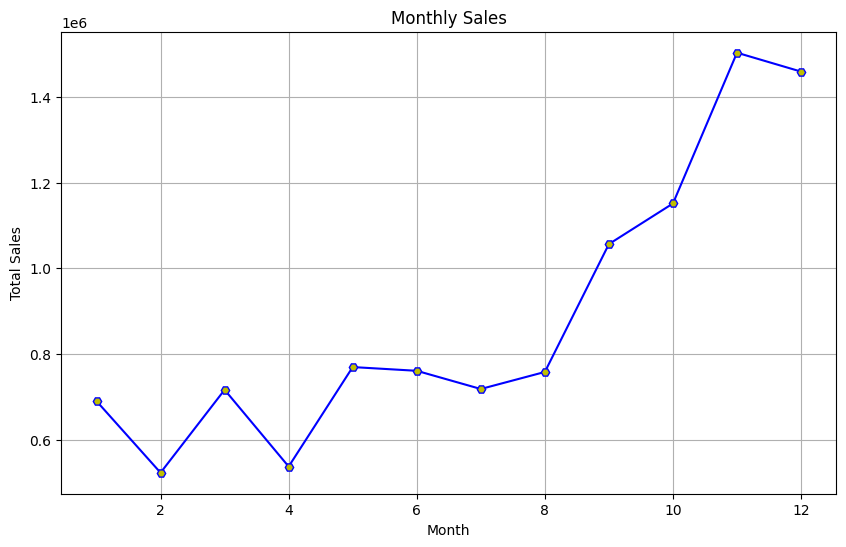

In [ ]:
monthly_sales = df2.groupby('month')['Total_Price'].sum()
monthly_sales.plot(kind='line',color='b',marker='H',mfc='y',figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

#####**Insights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year

### 2) Top 5 countries based on total sales

In [ ]:
top_5_countries = df2.groupby('Country')['Total_Price'].sum().nlargest(5)
top_5_countries


,Total_Price
Country,
United Kingdom,9001192.244
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370


In [ ]:
Total_sales = df2['Total_Price'].sum()
gtm = Total_sales / 1_000_000
gtm

np.float64(10.641558954000006)

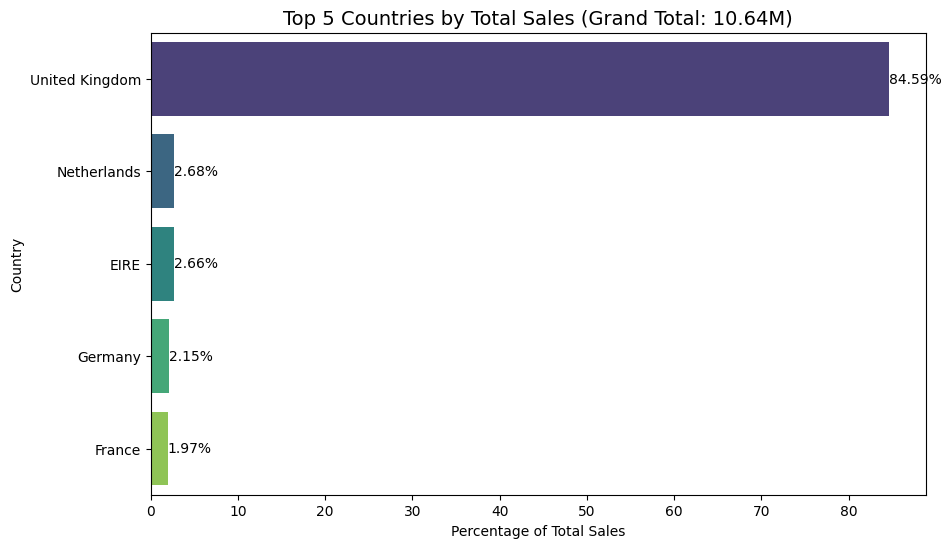

In [ ]:
# Calculate the total percentage for each
percentages = (top_5_countries / Total_sales) * 100

# Create the horizontal bar plot with percentages
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=percentages, y=percentages.index, palette="viridis")

# Add percentage labels to the bars
for bar, percentage in zip(bars.patches, percentages):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"{percentage:.2f}%", ha='left', va='center')

plt.title(f"Top 5 Countries by Total Sales (Grand Total: {gtm:.2f}M)", fontsize=14)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.show()


##### **Insights**

1) United Kingdom alone contributes ~84.6% of the total sales — an overwhelming majority.

2) A business overly reliant on one region (like the UK here) faces high regional concentration risk. Any disruptions (economic, political, or regulatory) in that country could impact revenue significantly.


### 3. Top 5 products based on sales

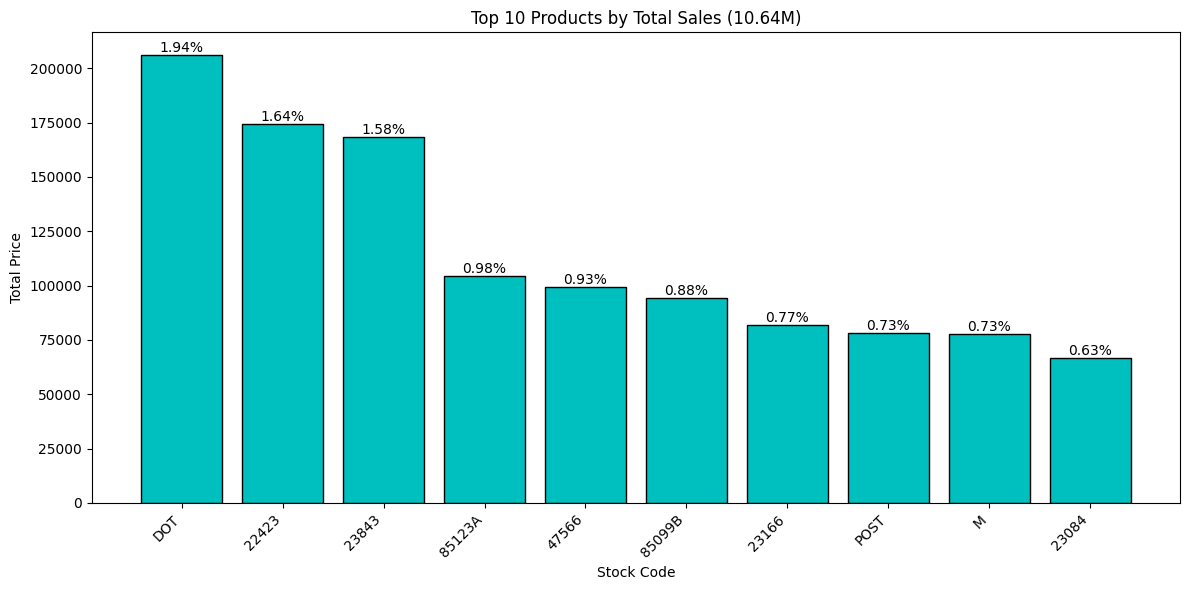

In [ ]:
import matplotlib.pyplot as plt

# Calculate total price for each product
product_sales = df2.groupby('StockCode')['Total_Price'].sum().sort_values(ascending=False).head(10)

# Calculate percentages
total_sales = df2['Total_Price'].sum()
percentages = (product_sales / total_sales) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(product_sales.index, product_sales.values,color= 'c',edgecolor='k')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Stock Code')
plt.ylabel('Total Price')
plt.title(f"Top 10 Products by Total Sales ({gtm:.2f}M)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#####***Insights***

1) The product with Stock Code 'DOT' ranks #1, contributing ~1.93% of the grand total sales.

2) This product alone generates over 200K, indicating high customer demand or frequent bulk orders

### 4) RFM Analysis

In [ ]:
current_date=df2['InvoiceDate'].max()+pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm= df2.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Price': 'sum'})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
## To check
df2[df2.CustomerID==12347]['Total_Price'].sum()

np.float64(4310.000000000001)

In [ ]:
## Segment Customers based on RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [ ]:
rfm.sort_values(by='RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
18283.0,4,721,2045.53,4,4,4,12
18245.0,7,175,2567.06,4,4,4,12
18241.0,10,104,2073.09,4,4,4,12
18229.0,12,164,7276.90,4,4,4,12
18225.0,3,269,5504.96,4,4,4,12
...,...,...,...,...,...,...,...
14962.0,271,5,126.70,1,1,1,3
14964.0,247,13,206.21,1,1,1,3
14981.0,246,8,102.12,1,1,1,3


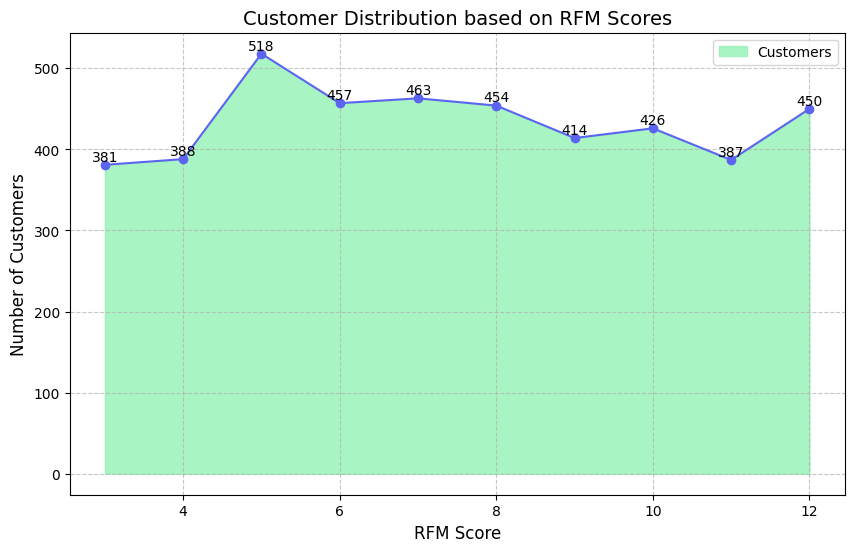

In [ ]:
rfm_counts = rfm['RFM_Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.fill_between(rfm_counts.index, rfm_counts.values, alpha=0.8, color='#94F2B5', label='Customers')  # Filled area
plt.plot(rfm_counts.index, rfm_counts.values, marker='o', linestyle='-', color='#5C64F2')  # Line with markers
plt.xlabel("RFM Score", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Customer Distribution based on RFM Scores", fontsize=14)

# Add labels for each data point
for x, y in zip(rfm_counts.index, rfm_counts.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=10)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#####Insights:

1) Score 5 has the highest customer count (516) – these are moderately engaged customers with good potential to convert into loyal buyers.

2) Score 12 also has a strong count (447) – these are likely your most loyal and high-value customers. Prioritize them for exclusive offers.

3) Drop at Scores 4 and 11 – these segments may need re-engagement or targeted promotions to boost activity.


### 5) Hourly Sales Distribution Across the Week

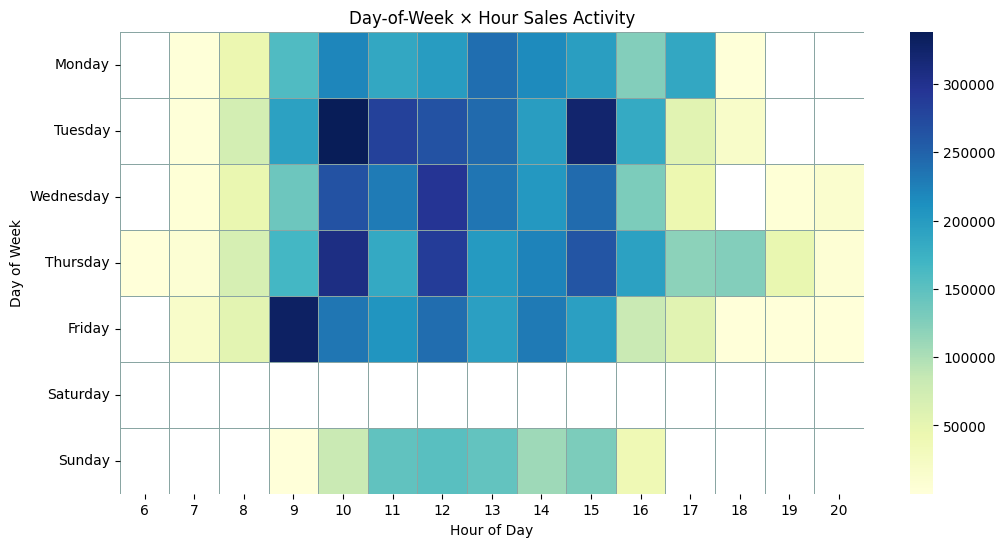

In [ ]:
import calendar
df2['DayOfWeekName'] = df2['InvoiceDate'].dt.day_name()
df2['Hour'] = df2['InvoiceDate'].dt.hour

sales_activity_named = df2.groupby(['DayOfWeekName', 'Hour'])['Total_Price'].sum().unstack()
# Optional: Order the days correctly
ordered_days = list(calendar.day_name)
sales_activity_named = sales_activity_named.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_activity_named, cmap='YlGnBu', annot=False, fmt=".0f", linewidths=.5,linecolor='#8AA6A3')
plt.title('Day-of-Week × Hour Sales Activity')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


##### **Insights**
1) Sales are highest during midday hours (11 AM to 2 PM) across most weekdays,
   indicating a strong buyer presence during business hours.

2) A noticeable dip in sales occurs on Saturday and Sunday, possibly indicating
   **reduced** B2B activity or business hours.

### 6) Customer Churn Analysis

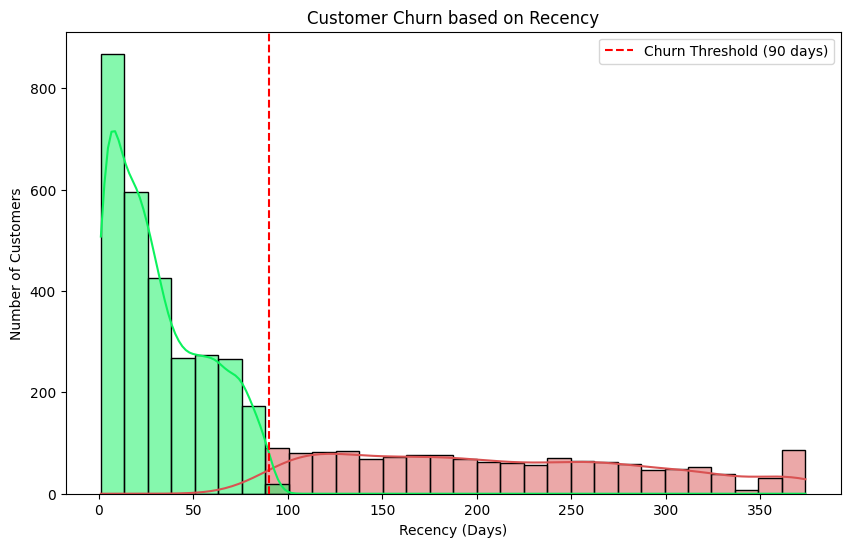

In [ ]:
churn_threshold = 90  # Define churn threshold in days

# Create a new column indicating churn status
rfm['Churned'] = rfm['Recency'] > churn_threshold

# Prepare the DataFrame for seaborn (long-form data)
plt.figure(figsize=(10, 6))
sns.histplot(data=rfm, x='Recency', kde=True, hue='Churned', bins=30, palette=['#0CF25D', '#D95252'])

# Add the threshold line
plt.axvline(churn_threshold, color='red', linestyle='--', label=f'Churn Threshold ({churn_threshold} days)')

# Add labels
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.title('Customer Churn based on Recency')
plt.legend()
plt.show()

#####**Insights**

1) Churn Identification: Customers who haven’t made a purchase in the last 90 days or more are considered churned. This segment makes up a significant portion, highlighting a need for re-engagement strategies.

2) Distribution Observation: The majority of customers fall below the 90-day recency mark, suggesting strong engagement overall—but the right tail indicates a growing risk of churn among long-inactive users.

3) Actionable Threshold: The 90-day churn threshold acts as a valuable benchmark for retention campaigns. Targeting users nearing or just past this mark can reduce churn effectively.

### 7) Transaction Density: Quantity vs. Unit Price (Zoomed-In)

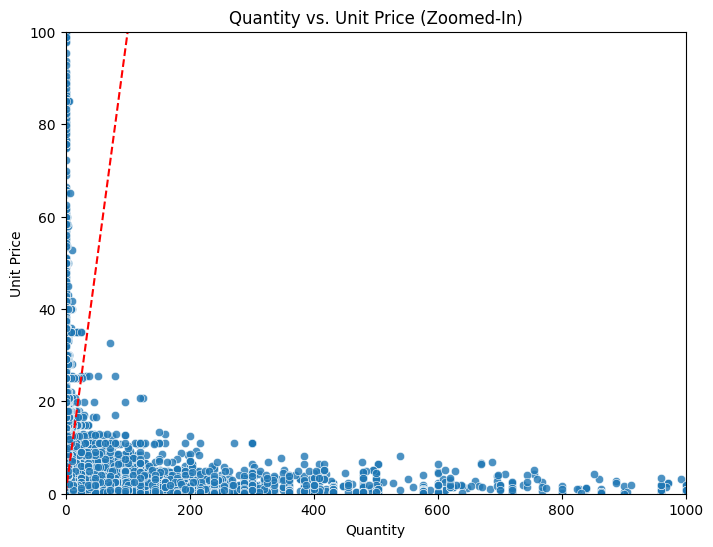

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='Quantity', y='UnitPrice', alpha=0.8)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--')  # Diagonal reference line
plt.xlim(0, 1000)  # Focus on the main part (adjust limits as needed)
plt.ylim(0, 100)   # Focus on the main part (adjust limits as needed)
plt.title('Quantity vs. Unit Price (Zoomed-In)')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()


#####**Insights**
1) High Volume of Low-Value Transactions:
Most purchases involve low quantities and low unit prices, indicating a large number of everyday or casual buyers.

2) Bulk-Buy Behavior Identified:
A small set of transactions shows high quantities with significantly lower unit prices, suggesting possible wholesale or discount-driven bulk orders.

3) Few High-Value Outliers:
Sparse points with high unit prices relative to quantity may indicate premium products, pricing anomalies, or data worth further review

In [ ]:
# Define a threshold for transaction density (adjust as needed)
quantity_threshold = 1000   # Example: Transactions with quantity >= 10
unit_price_threshold = 100  # Example: Transactions with unit price >= 5

# Filter df2 based on the thresholds
dense_transactions = df2[(df2['Quantity'] <= quantity_threshold) & (df2['UnitPrice'] <= unit_price_threshold)]

# Export the filtered data to a CSV file
dense_transactions.to_csv('dense_transactions.csv', index=False)